# Context

Exploring TimesNet, latest advance in Time-Series Forecasting, using Marco Peixerio's medium article to get started

[Medium Article about TmesNet](https://medium.com/towards-data-science/timesnet-the-latest-advance-in-time-series-forecasting-745b69068c9c)

# Enviorment Setup

## Installation of Packages

In [ ]:
!pip install neuralforecast

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, TimesNet
from neuralforecast.losses.numpy import mae, mse

# Preprocessing

In [ ]:
df = pd.read_csv('etth1.csv')
value_names = [col for col in df.columns if col != 'date']

df['date'] = pd.to_datetime(df['date'])



# Group by the unique combination of identifier columns

df_by_value = {}
for value in value_names:
    # Selecting columns 'date' and 'value_column' for the new DataFrame
    new_df = df[['date', value]].copy()

    # Renaming columns 'date' to 'ds' and 'value_column' to 'y'
    new_df = new_df.rename(columns={'date': 'ds', value: 'y'})

    # Adding a 'unique_id' column to the new DataFrame
    new_df.insert(1,'unique_id',value)

    # Store the updated DataFrame in the dictionary
    df_by_value[value] = new_df


display(df_by_value["OT"])


FileNotFoundError: ignored

# Modelling

## Visualization

NameError: ignored

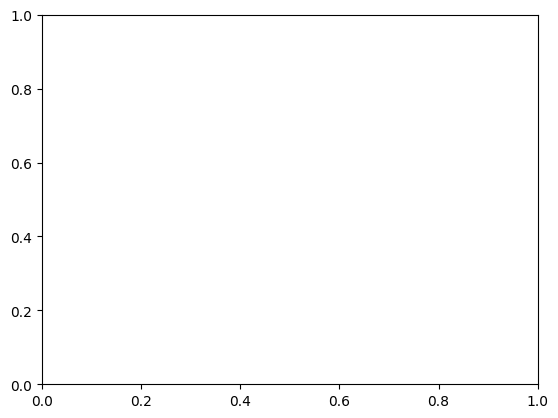

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_by_value['OT']['y'])
ax.set_xlabel('Time')
ax.set_ylabel('Oil temperature')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
horizon = 96

models = [NHITS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         TimesNet(h=horizon,
                 input_size=2*horizon,
                 max_steps=50)]



## Training

In [ ]:
nf = NeuralForecast(models=models, freq='H')
preds_df = nf.cross_validation(df=df_by_value['OT'], step_size=horizon, n_windows=2)

## Predictions

In [ ]:
fig, ax = plt.subplots()

ax.plot(preds_df['y'], label='actual')
ax.plot(preds_df['NHITS'], label='N-HITS', ls='--')
ax.plot(preds_df['NBEATS'], label='N-BEATS', ls=':')
ax.plot(preds_df['TimesNet'], label='TimesNet', ls='-.')

ax.legend(loc='best')
ax.set_xlabel('Time steps')
ax.set_ylabel('Oil temperature')

fig.autofmt_xdate()
plt.tight_layout()

## Evaluation

In [ ]:
data = {'N-HiTS': [mae(preds_df['NHITS'], preds_df['y']), mse(preds_df['NHITS'], preds_df['y'])],
       'N-BEATS': [mae(preds_df['NBEATS'], preds_df['y']), mse(preds_df['NBEATS'], preds_df['y'])],
       'TimesNet': [mae(preds_df['TimesNet'], preds_df['y']), mse(preds_df['TimesNet'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)